In [18]:
%config IPCompleter.greedy=True

In [19]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
rec_results = pd.read_csv('./recursive.txt')

In [21]:
rec_summary = rec_results.groupby('n').agg([np.min, np.max, np.mean, np.var, np.std])
rec_summary

iters                                          
       amin   amax       mean          var        std
n                                                    
100     916   1113   1023.518   959.508693  30.975937
200    1911   2232   2070.964  1802.880465  42.460340
300    3069   3359   3223.252  2603.844184  51.027877
400    3969   4333   4176.314  3767.670745  61.381355
500    5291   5692   5487.894  4652.231226  68.207267
600    6284   6719   6475.670  6100.858818  78.107995
700    7136   7631   7375.238  6225.724806  78.903262
800    8092   8594   8383.240  6534.787976  80.838035
900    9433   9983   9711.042  8217.046329  90.647925
1000  10728  11295  10999.760  9523.565531  97.588757

In [22]:
def compute_t(data):
    return np.sqrt(data['var'] / 0.005)

In [23]:
rec_iters = rec_summary['iters']

In [24]:
t = compute_t(rec_iters)

In [25]:
def compute_chebyshev_bounds(data, t):
    return data['mean'] + t, data['mean'] - t

In [26]:
x_u, x_l = compute_chebyshev_bounds(rec_iters, t)

In [27]:
def draw_plot(data, x_u, x_l):
    x = np.linspace(100, 1000, 10)
    fix, ax = plt.subplots(figsize=(20,20))
    ax.plot(x, data['amin'], label="min")
    ax.plot(x, data['amax'], label="max")
    ax.plot(x, data['mean'], label="mean")
    ax.plot(x, x_u, label="chebyshev_upper")
    ax.plot(x, x_l, label="chebyshev_lower")
    ax.legend()

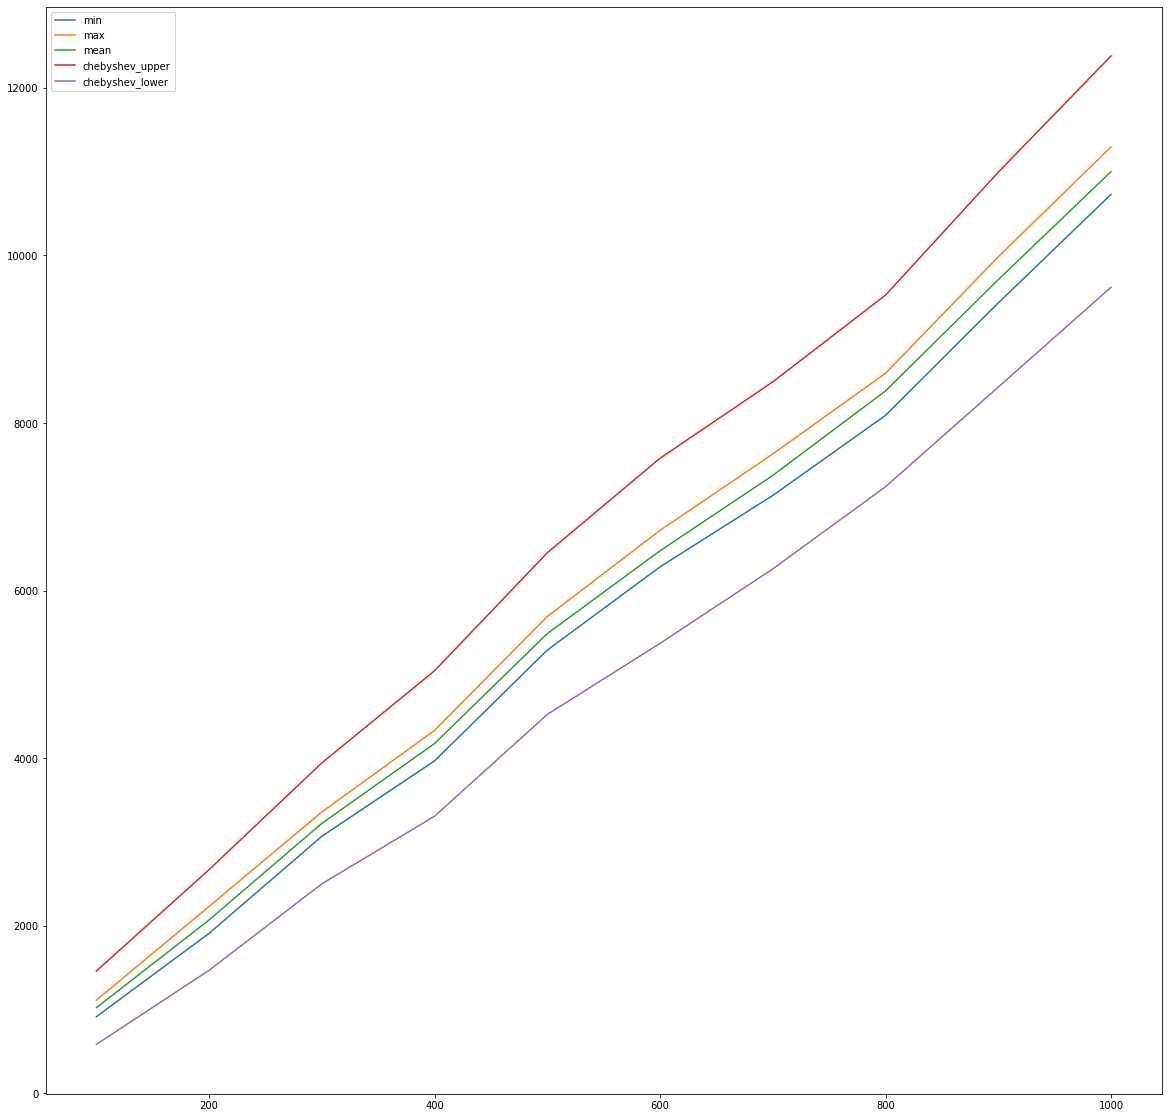

In [28]:
draw_plot(rec_iters, x_u, x_l)